In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset into a dataframe
df = pd.read_csv('salary_cleaned_set.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,company_txt,city,state,same_state,age,python,excel,aws,tableau,spark
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,...,Healthfirst,New York,NY,1,30,0,0,1,0,0
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,ManTech,Chantilly,VA,0,55,0,0,0,0,0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,...,Analysis Group,Boston,MA,1,42,1,1,1,0,0
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,...,INFICON,Newton,MA,0,23,1,1,1,0,0
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Affinity Solutions,New York,NY,1,25,1,1,0,0,0


In [58]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'state', 'same_state', 'age', 'python', 'excel',
       'aws', 'tableau', 'spark'],
      dtype='object')

In [5]:
#Functions for simpliying job titles and extracting seniority

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else: 
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else: 
        return 'na'

In [6]:
# create a column for simplied job titles
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    455
na                 69
analyst            55
data engineer      47
mle                36
manager             7
director            3
Name: job_simp, dtype: int64

In [7]:
# create a column for seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        576
senior     94
jr          2
Name: seniority, dtype: int64

In [62]:
# states
df.state.value_counts()

 CA              165
 VA               89
 MA               62
 NY               52
 MD               40
 IL               30
 DC               26
 TX               17
 WA               16
 OH               14
 PA               12
 MO               12
United States     11
 NJ               10
 CO               10
 GA                9
 NC                9
 TN                8
 FL                8
Remote             6
 OK                6
 WI                6
 IN                5
 MI                5
 AL                4
 CT                4
 MN                4
 AZ                4
 NE                3
 UT                3
 IA                3
 RI                2
New Jersey         2
 SC                2
 OR                2
Utah               2
 NH                2
 MS                1
 LA                1
 KS                1
Texas              1
 DE                1
California         1
 WV                1
Name: state, dtype: int64

In [8]:
# fix states
df = df[~df['state'].isin(['California', 'Texas', 'New Jersey', 'Utah', 'United States', 'Remote'])]
df['state'].value_counts()        

 CA    165
 VA     89
 MA     62
 NY     52
 MD     40
 IL     30
 DC     26
 TX     17
 WA     16
 OH     14
 MO     12
 PA     12
 NJ     10
 CO     10
 NC      9
 GA      9
 TN      8
 FL      8
 OK      6
 WI      6
 IN      5
 MI      5
 CT      4
 AZ      4
 AL      4
 MN      4
 NE      3
 UT      3
 IA      3
 OR      2
 SC      2
 RI      2
 NH      2
 DE      1
 LA      1
 MS      1
 KS      1
 WV      1
Name: state, dtype: int64

In [9]:
# Create a column for job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3389
1      4076
2      8749
3      3349
4      2728
       ... 
667    3653
668    1251
669    2793
670    3426
671    3000
Name: desc_len, Length: 649, dtype: int64

In [65]:
df['Competitors']

0                EmblemHealth, UnitedHealth Group, Aetna
1                                                     -1
2                                                     -1
3      MKS Instruments, Pfeiffer Vacuum, Agilent Tech...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
667                                                   -1
668                                                   -1
669                                                   -1
670                                                   -1
671                                                   -1
Name: Competitors, Length: 649, dtype: object

In [10]:
# create a column for the number of competitor companies
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [9]:
df.num_comp

0      3
1      0
2      0
3      3
4      3
      ..
667    0
668    0
669    0
670    0
671    0
Name: num_comp, Length: 649, dtype: int64

In [68]:
df[['min_salary', 'hourly']]

,min_salary,hourly
0,137,0
1,137,0
2,137,0
3,137,0
4,137,0
...,...,...
667,105,0
668,105,0
669,105,0
670,105,0


In [11]:
# convert hourly wage into annual wage for 'per hour' jobs
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [70]:
df[['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
0,0,137,171
1,0,137,171
2,0,137,171
3,0,137,171
4,0,137,171
...,...,...,...
667,0,105,167
668,0,105,167
669,0,105,167
670,0,105,167


In [12]:
# remove \n from company_txt
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0               Healthfirst 
1                   ManTech 
2            Analysis Group 
3                   INFICON 
4        Affinity Solutions 
               ...          
667                TRANZACT 
668                     JKGT
669               AccessHope
670    ChaTeck Incorporated 
671           1-800-Flowers 
Name: company_txt, Length: 649, dtype: object

In [72]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,excel,aws,tableau,spark,desc_len,num_comp
count,649.000000,649.000000,649.0,649.0,649.000000,649.000000,637.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,3.516795,1628.963020,0.0,0.0,99.395994,148.323575,123.841444,0.414484,32.095532,0.728814,0.442219,0.257319,0.187982,0.283513,3492.280431,0.708783
std,1.418586,761.891876,0.0,0.0,32.780820,47.741169,35.907124,0.493013,40.184146,0.444915,0.497033,0.437494,0.390999,0.451051,1639.480379,1.232257
min,-1.000000,-1.000000,0.0,0.0,31.000000,56.000000,43.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000
25%,3.400000,1917.000000,0.0,0.0,79.000000,119.000000,103.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409.000000,0.000000
50%,3.800000,1994.000000,0.0,0.0,92.000000,133.000000,115.500000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3349.000000,0.000000
75%,4.300000,2008.000000,0.0,0.0,122.000000,165.000000,137.500000,1.000000,40.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4312.000000,1.000000
max,5.000000,2019.000000,0.0,0.0,212.000000,331.000000,271.500000,1.000000,242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10524.000000,3.000000


In [73]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'state', 'same_state', 'age', 'python', 'excel',
       'aws', 'tableau', 'spark', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

#### Explore numerical columns using histograms

<AxesSubplot:>

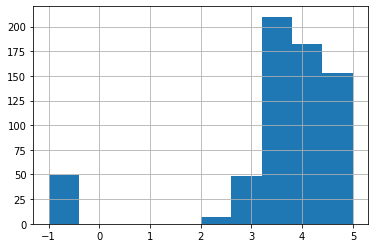

In [74]:
df.Rating.hist()

<AxesSubplot:>

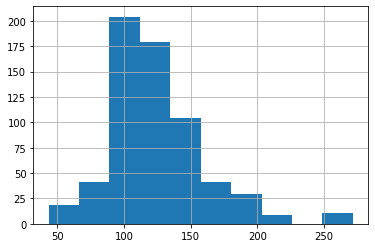

In [75]:
df.avg_salary.hist()

<AxesSubplot:>

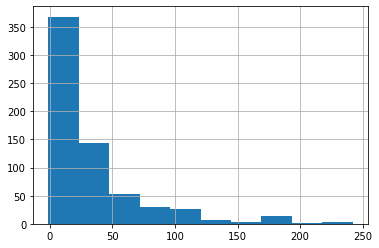

In [76]:
df.age.hist()

<AxesSubplot:>

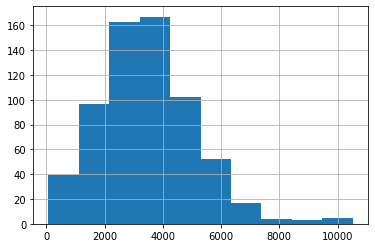

In [77]:
df.desc_len.hist()

#### Explore the statistics of categorical columns using boxplots

<AxesSubplot:>

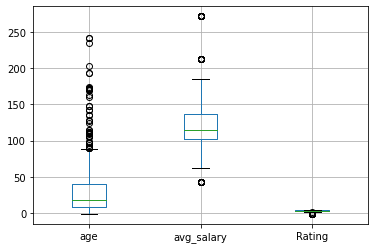

In [78]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

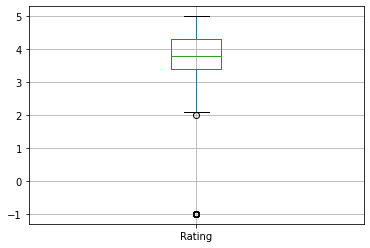

In [79]:
df.boxplot(column = 'Rating')

In [80]:
# Check correlatoin between numerical columns
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.019416,0.138497,0.250079
avg_salary,-0.019416,1.000000,-0.063523,0.011506
Rating,0.138497,-0.063523,1.000000,-0.015804
desc_len,0.250079,0.011506,-0.015804,1.000000


<AxesSubplot:>

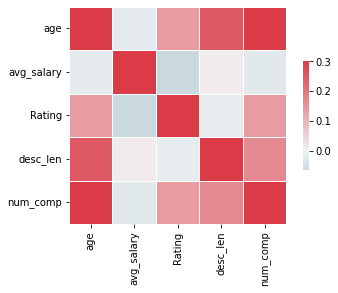

In [11]:
#create a heat map to visualize correlation
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len','num_comp']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [82]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'state', 'same_state', 'age', 'python', 'excel',
       'aws', 'tableau', 'spark', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

#### Categorical variables: can't take the ones that are too big because we want to graph them

In [13]:
# create a seperate dataframe of categorical columns
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'state', 'same_state', 'aws', 'excel', 'spark', 'job_simp', 'seniority']]

graph for Location: total = 201


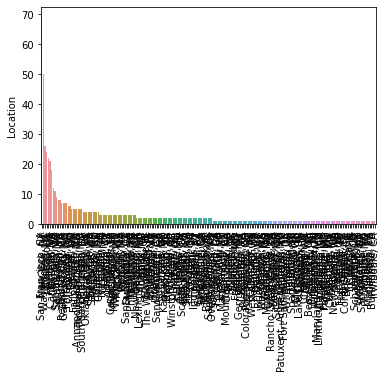

graph for Headquarters: total = 224


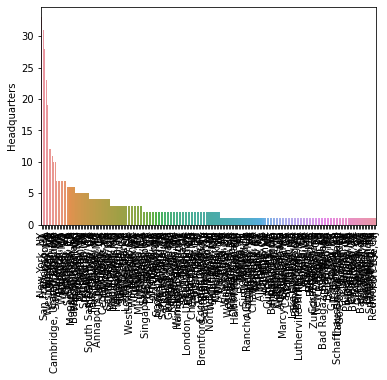

graph for Size: total = 9


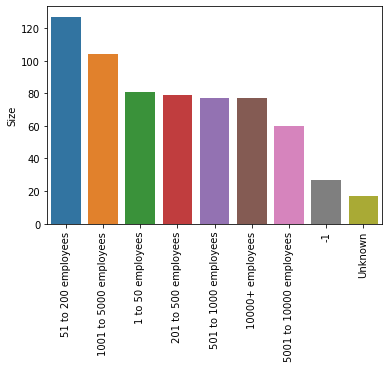

graph for Type of ownership: total = 13


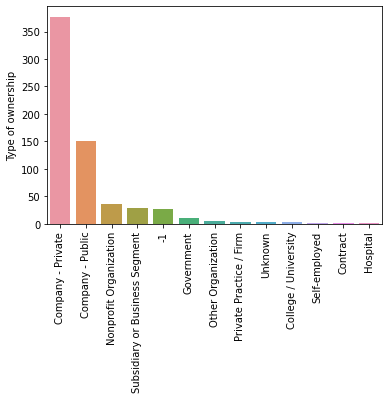

graph for Industry: total = 58


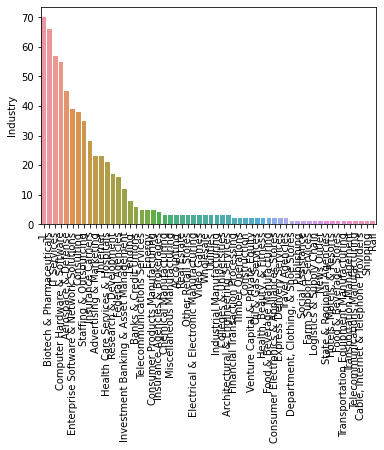

graph for Sector: total = 23


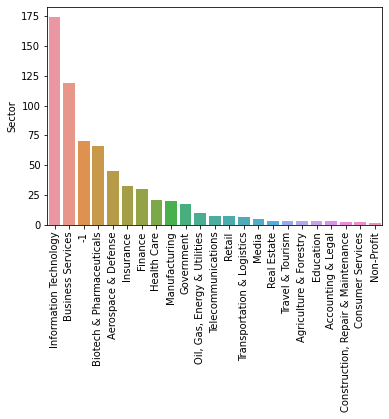

graph for Revenue: total = 14


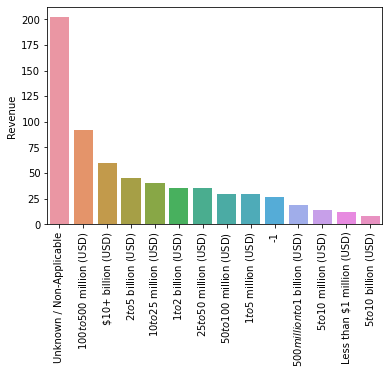

graph for company_txt: total = 418


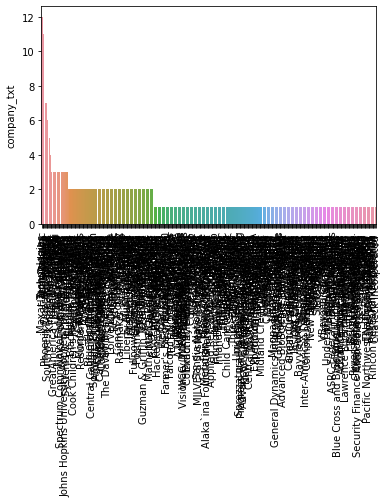

graph for state: total = 38


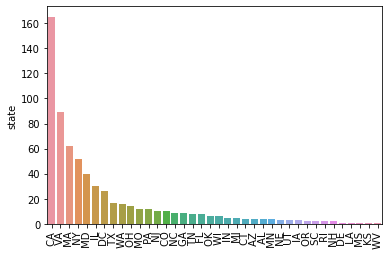

graph for same_state: total = 2


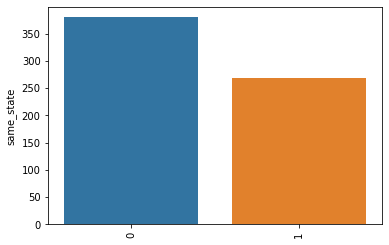

graph for aws: total = 2


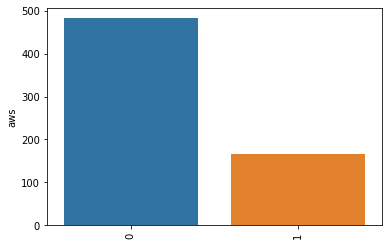

graph for excel: total = 2


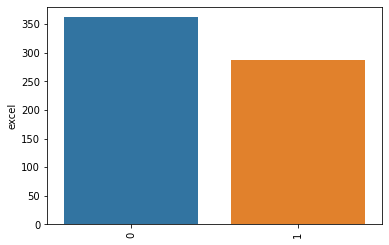

graph for spark: total = 2


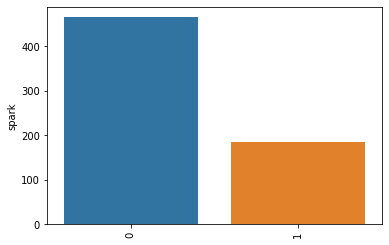

graph for job_simp: total = 7


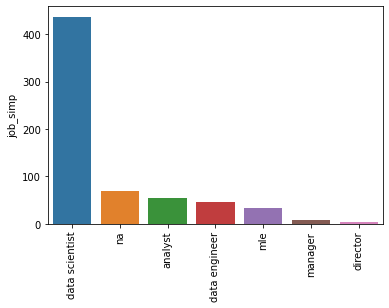

graph for seniority: total = 3


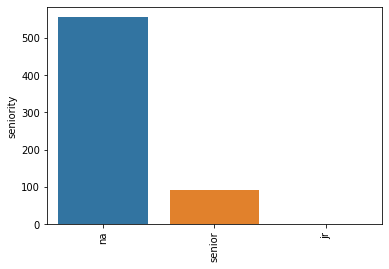

In [89]:
# create a loop to plot bar charts of all columns in df_cat
%matplotlib inline

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


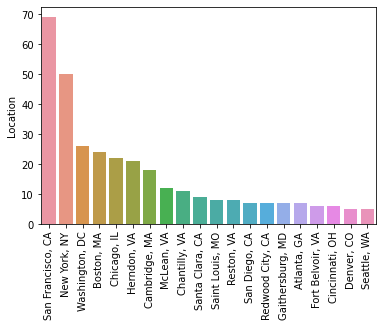

graph for Headquarters: total = 20


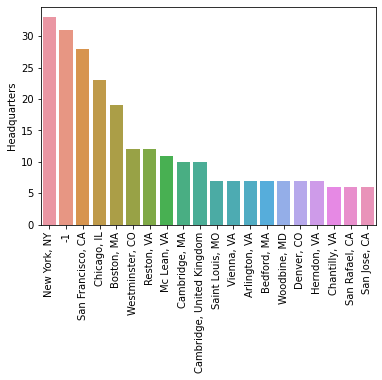

graph for company_txt: total = 20


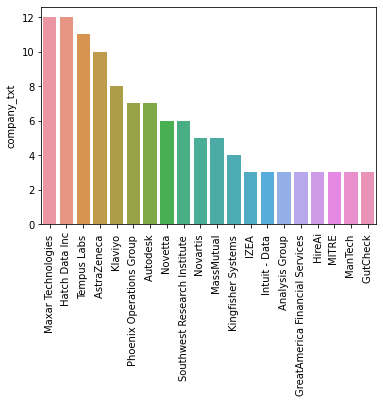

In [91]:
# Plot columns that have less categories
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [92]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'state', 'same_state', 'age', 'python', 'excel',
       'aws', 'tableau', 'spark', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

#### Generate pivot tables

In [93]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,115.572727
data engineer,115.033333
data scientist,125.835294
director,128.833333
manager,124.071429
mle,112.235294
na,129.455882


In [94]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          76.500000
               na         114.135135
               senior     121.000000
data engineer  na         115.961538
               senior     109.000000
data scientist na         126.555851
               senior     120.306122
director       na         120.500000
               senior     133.000000
manager        na         124.666667
               senior     120.500000
mle            na         107.260000
               senior     126.055556
na             na         126.391667
               senior     152.437500

In [101]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['state', 'job_simp'], values='avg_salary', aggfunc='count').sort_values('state', ascending=False)

avg_salary
state job_simp                  
 WV   data scientist           1
 WI   na                       1
      data scientist           4
      analyst                  1
 WA   mle                      2
      data scientist          12
      analyst                  1
 VA   data scientist          64
      data engineer            5
      analyst                  8
      mle                      5
      na                       5
 UT   data scientist           1
      data engineer            2
 TX   na                       2
      data scientist          12
      analyst                  3
 TN   mle                      1
      data scientist           5
      analyst                  2
 SC   na                       1
      analyst                  1
 RI   director                 2
 PA   mle                      2
      analyst                  4
      data scientist           4
      na                       1
 OR   mle                      1
      data scientist           1
 OK   na                       4
      analyst                  2
 OH   na                       2
      mle                      1
      data scientist           9
      data engineer            2
 NY   data engineer            4
      data scientist          40
      analyst                  1
      mle                      3
      na                       3
 NJ   na                       1
      data scientist           6
      analyst                  1
 NH   mle                      1
      data scientist           1
 NE   data scientist           2
      analyst                  1
 NC   mle                      2
      manager                  1
      data engineer            1
      na                       3
      data scientist           0
      analyst                  1
 MS   na                       1
 MO   data scientist           9
      data engineer            2
      analyst                  1
 MN   data scientist           1
      analyst                  3
 MI   manager                  1
      data scientist           4
 MD   na                       8
      data scientist          27
      data engineer            3
      analyst                  2
 MA   director                 1
      analyst                  1
      data scientist          36
      na                      19
      manager                  1
      mle                      3
 LA   analyst                  1
 KS   data scientist           1
 IN   na                       1
      data scientist           1
      data engineer            1
      analyst                  2
 IL   data engineer            2
      analyst                  3
      mle                      3
      na                       3
      data scientist          19
 IA   analyst                  3
 GA   data scientist           9
 FL   na                       2
      data scientist           2
      data engineer            4
 DE   data scientist           1
 DC   data scientist          25
      analyst                  1
 CT   data scientist           2
      data engineer            2
 CO   mle                      1
      data scientist           9
 CA   na                       8
      mle                      9
      manager                  4
      data scientist         114
      data engineer           15
      analyst                 12
 AZ   na                       1
      data scientist           2
      data engineer            1
 AL   na                       2
      data scientist           1
      data engineer            1

In [102]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
state,
DE,271.500000
AZ,147.000000
TX,146.000000
WI,144.000000
WA,136.333333
IL,135.026316
NY,132.587500
VA,129.757812
NH,128.500000


In [103]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'city', 'state', 'same_state', 'age', 'python', 'excel',
       'aws', 'tableau', 'spark', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [106]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'avg_salary', 'num_comp', 'hourly', 'employer_provided', 'python', 'tableau', 'excel', 'aws', 'spark', 'Type of ownership']]

In [117]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(i)
        print(pd.pivot_table(df_pivots, index=i, values= 'avg_salary', aggfunc='mean').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 2.0    148.000000
-1.0    135.411111
 2.3    133.000000
 2.7    132.888889
 3.5    129.672414
 4.7    128.840909
 4.6    128.291667
 5.0    127.411765
 4.0    127.333333
 3.4    127.316667
 4.5    126.843750
 3.6    126.620000
 4.1    125.068182
 3.8    123.810811
 3.2    123.264706
 4.2    121.396552
 4.8    121.052632
 3.9    120.289474
 4.4    119.804348
 4.3    118.714286
 3.1    117.666667
 3.3    117.500000
 2.9    116.458333
 3.7    115.526316
 2.5    114.250000
 4.9    109.277778
 3.0    108.071429
 2.2    103.000000
 2.4     99.500000
 2.1     97.500000
 2.8     97.166667
 2.6     95.750000
Industry
                                          avg_salary
Industry                                            
Publishing                                271.500000
Transportation Equipment Manufacturing    183.000000
State & Regional Agencies                 183.000000
Other Retail Stores                       183.000000
Hotels, Motels, & Re

In [119]:
pd.pivot_table(df_pivots, index='Revenue', columns='python', values='avg_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),10.0,24.0
$1 to $5 million (USD),2.0,27.0
$10 to $25 million (USD),10.0,30.0
$10+ billion (USD),18.0,42.0
$100 to $500 million (USD),31.0,60.0
$2 to $5 billion (USD),14.0,31.0
$25 to $50 million (USD),8.0,27.0
$5 to $10 billion (USD),4.0,4.0
$5 to $10 million (USD),3.0,11.0


#### Create a word cloud from the job description column

In [3]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

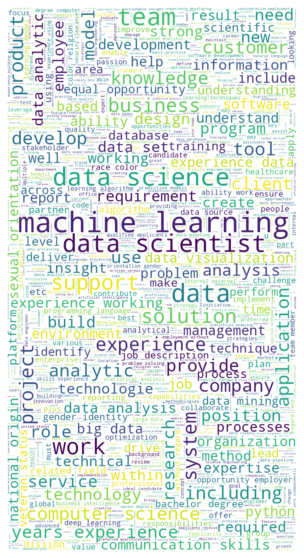

In [4]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
# download the dataframe as a csv file
df.to_csv('data_eda.csv', index=False)